In [ ]:
# calculates NDVI from photo

In [179]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import glob
import math
import scipy
import sklearn
import pytesseract 
import png

In [180]:
# shows visual photo

vis_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_08_184805.jpg'
response = requests.get(vis_photo)
VIS_img = Image.open(BytesIO(response.content))
vis_img_exp = vis_slice

In [182]:
# finds all pixel values for visual image

width, height = VIS_img.size
vis_pixel_values = list(VIS_img.getdata())
vis_pixel_values = np.array(vis_pixel_values).reshape((width, height, 3))

In [183]:
# IR photo

ir_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_08_201805.jpg'
response = requests.get(ir_photo)
IR_img = Image.open(BytesIO(response.content))
IR_img_exp = ir_slice

In [184]:
# finds all pixel values for IR image

width, height = IR_img.size
IR_pixel_values = list(IR_img.getdata())
IR_pixel_values = np.array(IR_pixel_values).reshape((width, height, 3))


In [243]:
# calculate r'

x=0
y=0
width,height = VIS_img.size
red_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        red_array[x,y] = vis_pixel_values[x,y,0]

r_prime = red_array/math.sqrt(vis_slice)

In [187]:
# calculating all green values 

x=0
y=0
width,height = VIS_img.size
green_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        green_array[x,y] = vis_pixel_values[x,y,1]

In [188]:
# calculating all blue values

x=0
y=0
width,height = VIS_img.size
blue_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        blue_array[x,y] = vis_pixel_values[x,y,2]

In [189]:
# calculating all IR values

x=0
y=0
width,height = IR_img.size
IR_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        IR_array[x,y] = IR_pixel_values[x,y,0]

In [239]:
# finding z'

z = (red_array + green_array + blue_array) + IR_array

z_prime = z/math.sqrt(ir_slice)

In [240]:
# finding y'

y_array = 0.30*red_array + 0.59*green_array + 0.11*blue_array

y_prime = y_array/math.sqrt(ir_slice)

In [237]:
# finding x'   X′ = Z′ −Y′   z'=z/sqrt(exposure of RGB+IR)

x_prime = z_prime - y_prime

In [235]:
# camera NDVI

np.seterr(divide='ignore', invalid='ignore')
camera_ndvi = ((x_prime-r_prime)/(x_prime+r_prime))
camera_ndvi

array([[-0.04513748, -0.04513748, -0.04287864, ..., -0.10632088,
        -0.10632088, -0.10632088],
       [-0.10632088, -0.10632088, -0.10632088, ..., -0.04287864,
        -0.04287864, -0.04287864],
       [-0.04328713, -0.0468659 , -0.04065192, ..., -0.03852624,
        -0.03628836, -0.0385043 ],
       ..., 
       [-0.22822017, -0.17504865, -0.23540042, ..., -0.23507836,
        -0.22961329, -0.23319863],
       [-0.178224  , -0.16698522, -0.23829641, ..., -0.12111103,
        -0.15680541, -0.1921683 ],
       [-0.18305304, -0.20765067, -0.19887332, ..., -0.20893619,
        -0.2174432 , -0.21093207]])

In [194]:
vis_img_exp = VIS_img.crop((118, 58, 180, 85))
vis_img_exp

In [195]:
ir_img_exp = IR_img.crop((118,58,180,85))
ir_img_exp

In [202]:
ir_exp_num = pytesseract.image_to_string(ir_img_exp, config = 'nobatch digits')
x = ir_exp_num[0:4]
ir_slice = int(x)

2193

In [206]:
vis_exp_num = pytesseract.image_to_string(vis_img_exp,config='nobatch digits')
y = vis_exp_num[0:4]
vis_slice = int(y)

In [262]:
camera_ndvi = camera_ndvi[np.logical_not(np.isnan(camera_ndvi))]
ndvi_mean = camera_ndvi.mean()
#vmin = ndvi_mean-0.1
#vmax = ndvi_mean+0.1
ndvi_mean

-0.15937116879431384

ValueError: not enough values to unpack (expected 2, got 1)

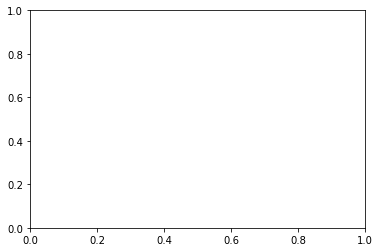

In [264]:
plt.pcolormesh(camera_ndvi, cmap=plt.cm.rainbow, vmin=-.2, vmax=1)